[View in Colaboratory](https://colab.research.google.com/github/shashank2806/mnist-digits-classifiers/blob/master/CNN_Keras.ipynb)

#CNN in Keras

Earlier we have built linear model and CNN in native TensorFlow. In this notebook we are going to use Keras API.

###Imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import math

In [0]:
# import keras model and layers
from keras.models import Sequential
from keras.layers import InputLayer, Input, Conv2D, Dense, Flatten, Reshape, MaxPooling2D, Dropout

In [6]:
# workaround for google colab
import os
work_dir = "/content/mnist-digits-classifiers/" 
if os.getcwd() != work_dir:
  !git clone https://github.com/shashank2806/mnist-digits-classifiers
os.chdir(work_dir)

Cloning into 'mnist-digits-classifiers'...
remote: Counting objects: 67, done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 67 (delta 36), reused 5 (delta 0), pack-reused 0
Unpacking objects: 100% (67/67), done.


In [8]:
# tensorflow version
tf.__version__

'1.10.1'

###Load data

We are using MNIST dataset which is about 12 MB

In [0]:
# Download MNIST data-set
from mnist import MNIST
data = MNIST(data_dir="data/MNIST/")

###Visualsize data

In [14]:
print("Size of:")
print("- Training-set:\t\t{}".format(data.num_train))
print("- Validation-set:\t{}".format(data.num_val))
print("- Test-set:\t\t{}".format(data.num_test))

Size of:
- Training-set:		55000
- Validation-set:	5000
- Test-set:		10000


In [15]:
# The number of pixels in each dimension of an image.
img_size = data.img_size

# The images are stored in one-dimensional arrays of this length.
img_size_flat = data.img_size_flat

# Tuple with height and width of images used to reshape arrays.
img_shape = data.img_shape

# Tuple with height, width and depth used to reshape arrays.
# This is used for reshaping in Keras.
img_shape_full = data.img_shape_full

# Number of classes, one class for each of 10 digits.
num_classes = data.num_classes

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = data.num_channels

img_size, img_size_flat, img_shape, img_shape_full, num_channels

(28, 784, (28, 28), (28, 28, 1), 1)

## Sequential Model

In [0]:
# Start sequential model
model = Sequential()

# Input layer, input_shape must be tuple containing image-size
model.add(InputLayer(input_shape=(img_size_flat,)))

# reshape array of 784 elements to (28*28*1)
model.add(Reshape(img_shape_full))

# Add first conv and max-pool layer
model.add(Conv2D(kernel_size=5, strides=1, filters=16, padding='same',
                 activation='relu', name='layer_conv1'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.25))
        
# Add second conv and maxpool layer
model.add(Conv2D(kernel_size=5, strides=1, filters=36, padding='same',
                 activation='relu', name='layer_conv2'))
model.add(MaxPooling2D(pool_size=2, strides=2))

# Flatten layer to give it as input to fully connected layer
model.add(Flatten())

# first fully connected layer
model.add(Dense(128, activation='relu'))

# last FC layer for classification
model.add(Dense(num_classes, activation='softmax'))

### Model Compilation

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Training

In [25]:
model.fit(x=data.x_train,
          y=data.y_train,
          epochs=10, batch_size=128)

Epoch 1/10
55000/55000 [==============================] - 5s 97us/step - loss: 0.0342 - acc: 0.9890
Epoch 2/10
55000/55000 [==============================] - 5s 96us/step - loss: 0.0265 - acc: 0.9915
Epoch 3/10
55000/55000 [==============================] - 5s 95us/step - loss: 0.0239 - acc: 0.9926
Epoch 4/10
55000/55000 [==============================] - 5s 95us/step - loss: 0.0202 - acc: 0.9936
Epoch 5/10
55000/55000 [==============================] - 5s 95us/step - loss: 0.0171 - acc: 0.9945
Epoch 6/10
55000/55000 [==============================] - 5s 96us/step - loss: 0.0148 - acc: 0.9952
Epoch 7/10
55000/55000 [==============================] - 5s 95us/step - loss: 0.0136 - acc: 0.9957
Epoch 8/10
55000/55000 [==============================] - 5s 95us/step - loss: 0.0113 - acc: 0.9959
Epoch 9/10
55000/55000 [==============================] - 5s 96us/step - loss: 0.0109 - acc: 0.9964
Epoch 10/10
55000/55000 [==============================] - 5s 95us/step - loss: 0.0089 - acc: 0.9969

###Evaluation

In [26]:
result = model.evaluate(x=data.x_test,
                        y=data.y_test)

10000/10000 [==============================] - 1s 103us/step


In [28]:
model.metrics_names

['loss', 'acc']

In [29]:
# contains loss and accuracy
result

[0.031058502746955038, 0.9913]

In [32]:
for name, value in zip(model.metrics_names, result):
    print(name, value)

loss 0.031058502746955038
acc 0.9913


**We have achieved an accuracy of 99.13% on test data.**

###Helper functions for plotting images

In [0]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

###Helper function to plot example errors

In [0]:
def plot_example_errors(cls_pred):
    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Boolean array whether the predicted class is incorrect.
    incorrect = (cls_pred != data.y_test_cls)

    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data.x_test[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = data.y_test_cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

###Prediction

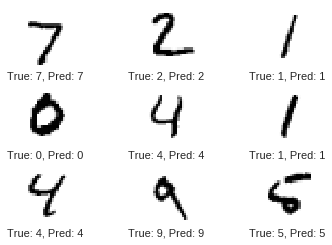

In [36]:
images = data.x_test[0:9]
cls_true = data.y_test_cls[0:9]
# predicted results as one-hot
y_pred = model.predict(x=images)
# get prdicted class
y_pred_cls = np.argmax(y_pred, axis=1)
# plot images
plot_images(images=images,
            cls_true=cls_true,
            cls_pred=y_pred_cls)

### Misclassified Images


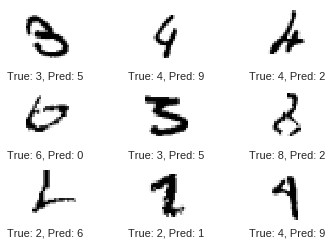

In [37]:
y_pred = model.predict(x=data.x_test)
cls_pred = np.argmax(y_pred, axis=1)
plot_example_errors(cls_pred)


##Saving and loading model